#### Internet Privacy poll assignment in Python

In [30]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv("../AnonymityPoll.csv")
data.describe() 

,Internet.Use,Smartphone,Age,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
count,1001.000000,959.000000,975.000000,940.000000,792.000000,790.000000,787.000000,753.000000,784.000000,894.000000
mean,0.774226,0.507821,52.370256,3.276596,3.795455,0.488608,62.848672,0.369190,0.163265,0.261745
std,0.418300,0.500200,18.597082,1.012218,2.699174,0.500187,31.472764,0.482906,0.369844,0.439831
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,37.000000,3.000000,2.000000,0.000000,41.428571,0.000000,0.000000,0.000000
50%,1.000000,1.000000,55.000000,3.000000,4.000000,0.000000,68.750000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,66.000000,4.000000,6.000000,1.000000,88.888889,1.000000,0.000000,1.000000
max,1.000000,1.000000,96.000000,5.000000,11.000000,1.000000,100.000000,1.000000,1.000000,1.000000


In [3]:
data.head(5)

,Internet.Use,Smartphone,Sex,Age,State,Region,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
0,1,0,Male,62,Massachusetts,Northeast,4,0,1,100.000000,0,0,0
1,1,0,Male,45,South Carolina,South,1,1,0,0.000000,1,0,1
2,0,1,Female,70,New Jersey,Northeast,4,0,0,NaN,0,0,NaN
3,1,0,Male,70,Georgia,South,4,3,1,88.888889,1,0,0
4,0,NaN,Female,80,Georgia,South,4,NaN,NaN,NaN,NaN,NaN,NaN


#### Q: How many respondents did not reply to the Internet.Use question?

In [4]:
#data["Internet.Use"].isnull().sum()
#or
sum(data["Internet.Use"].isnull())
#data['Internet.Use'].isnull().values.sum()

1

#### Q. How many participated in the poll

In [5]:
data.shape

(1002, 13)

#### Q: How many interviewees responded that they use a smartphone?
* How many interviewees responded that they don't use a smartphone?
* How many interviewees did not respond to the question, resulting in a missing value, or NA, in the summary() output?

In [6]:
data.Smartphone.sum()

487.0

In [7]:
#How many dont use a Smartphone
(data.Smartphone==0).sum()

472

In [8]:
#how many did not reply ie=NAn
data.Smartphone.isnull().sum()

43

#### Which of the following are states in the Midwest census region?

In [9]:
data[data.Region=='Midwest']['State'].value_counts()

Ohio            38
Illinois        32
Michigan        31
Indiana         27
Missouri        26
Wisconsin       23
Minnesota       15
Iowa            14
Kansas          14
Nebraska        11
North Dakota     5
South Dakota     3
Name: State, dtype: int64

In [10]:
data[data.Region=='South']['State'].value_counts()

Texas                   72
Florida                 42
Georgia                 34
North Carolina          32
Virginia                31
Kentucky                25
Maryland                18
Louisiana               17
Tennessee               17
Oklahoma                14
South Carolina          12
Mississippi             11
Alabama                 11
Arkansas                10
Delaware                 6
West Virginia            5
District of Columbia     2
Name: State, dtype: int64

#### Internet and Smartphone Users:
Many of the response variables (Info.On.Internet, Worry.About.Info, Privacy.Importance, Anonymity.Possible, and Tried.Masking.Identity) were not collected if an interviewee does not use the Internet or a smartphone, meaning the variables will have missing values for these interviewees.
* How many interviewees reported not having used the Internet and not having used a smartphone?
* How many interviewees reported having used the Internet and having used a smartphone?
* How many interviewees reported having used the Internet but not having used a smartphone?
* How many interviewees reported having used a smartphone but not having used the Internet?
* How many interviewees have a missing value for their Internet use?
* How many interviewees have a missing value for their smartphone use?




In [11]:
data[data['Internet.Use']==0][data['Smartphone']==0].shape

/Users/priyadesai/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


(186, 13)

In [12]:
data[data['Internet.Use']==1][data['Smartphone']==1].shape

(470, 13)

In [13]:
data[data['Internet.Use']==1][data['Smartphone']==0].shape

(285, 13)

In [14]:
data[data['Internet.Use']==0][data['Smartphone']==1].shape

(17, 13)

In [15]:
data['Internet.Use'].isnull().sum()

1

In [16]:
data['Smartphone'].isnull().sum()

43

#### Obtain a data frame called "limited", which is limited to interviewees who reported Internet use or who reported smartphone use

In [17]:
limited=data[(data['Smartphone']==1) | (data['Internet.Use']==1)]
limited.shape

(792, 13)

#### Which variables have missing values in the limited data frame? 
* What is the average number of pieces of personal information on the Internet, according to the Info.On.Internet variable?
* How many interviewees reported a value of 0 for Info.On.Internet?
* How many interviewees reported the maximum value of 11 for Info.On.Internet?
* 

In [18]:
limited['Info.On.Internet'].mean()

3.7954545454545454

In [19]:
limited[limited['Info.On.Internet'] == 0]['Info.On.Internet'].count()
#or
limited[limited['Info.On.Internet'] ==0].shape

(105, 13)

In [20]:
limited[limited['Info.On.Internet'] == 11].shape

(8, 13)

In [21]:
limited.shape

(792, 13)

#### What proportion of interviewees who answered the Worry.About.Info question worry about how much information is available about them on the Internet? Note that to compute this proportion you will be dividing by the number of people who answered the Worry.About.Info question, not the total number of people in the data frame.

In [22]:
float(limited[limited['Worry.About.Info'] ==1]['Worry.About.Info'].count())/ limited[(limited['Worry.About.Info'] ==1) | (limited['Worry.About.Info'] ==0)]['Worry.About.Info'].count()

0.48860759493670886

In [23]:
limited[limited['Worry.About.Info'] ==1]['Worry.About.Info'].count()

386

#### What proportion of interviewees who answered the Anonymity.Possible question think it is possible to be completely anonymous on the Internet?

In [24]:
limited[limited['Anonymity.Possible']==1]['Anonymity.Possible'].sum()/limited[(limited['Anonymity.Possible']==1 )| (limited['Anonymity.Possible']==0)]['Anonymity.Possible'].count()

0.3691899070385126

In [25]:
limited[(limited['Anonymity.Possible']==1 )| (limited['Anonymity.Possible']==0)]['Anonymity.Possible'].count()

753

#### What proportion of interviewees who answered the Tried.Masking.Identity question have tried masking their identity on the Internet?

In [26]:
limited[limited['Tried.Masking.Identity']==1]['Tried.Masking.Identity'].sum()/limited[(limited['Tried.Masking.Identity']==1) | (limited['Tried.Masking.Identity']==0 )]['Tried.Masking.Identity'].count()

0.16326530612244897

#### What proportion of interviewees who answered the Privacy.Laws.Effective question find United States privacy laws effective?


In [27]:
limited[limited['Privacy.Laws.Effective']==1]['Privacy.Laws.Effective'].sum()/limited[(limited['Privacy.Laws.Effective']==1) | (limited['Privacy.Laws.Effective']==0)]['Privacy.Laws.Effective'].count()

0.2558459422283356

In [ ]:
##Note sum( results ina  float where as count results in an integer- so while dividing it makes a difference!)
limited[(limited['Privacy.Laws.Effective']==1) | (limited['Privacy.Laws.Effective']==0)]['Privacy.Laws.Effective'].count()

#### Relating Demographics to Polling Results

Often, we are interested in whether certain characteristics of interviewees (e.g. their age or political opinions) affect their opinions on the topic of the poll (in this case, opinions on privacy). In this section, we will investigate the relationship between the characteristics Age and Smartphone and outcome variables Info.On.Internet and Tried.Masking.Identity, again using the limited data frame we built in an earlier section of this problem.

Build a histogram of the age of interviewees. What is the best represented age group in the population?



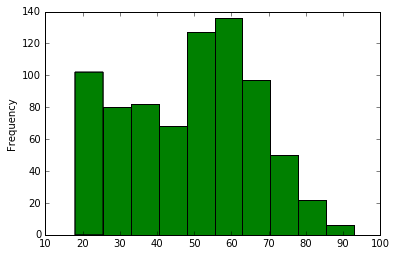

In [32]:
limited['Age'].plot.hist() ##or
limited['Age'].plot(kind='hist')

What is the largest number of interviewees that have exactly the same value in their Age variable AND the same value in their Info.On.Internet variable? In other words, what is the largest number of overlapping points in the plot plot(limited$Age, limited$Info.On.Internet)? 

In [38]:
limited.groupby('Age')['Info.On.Internet'].value_counts().sort_values(ascending=False).head()

Age  Info.On.Internet
60   1                   6
     0                   6
53   0                   6
18   6                   5
45   4                   5
dtype: int64

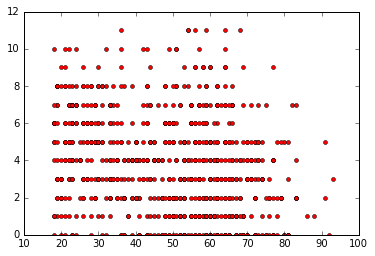

In [59]:
plt.plot(limited.Age, limited['Info.On.Internet'], 'ro',markersize=4 )

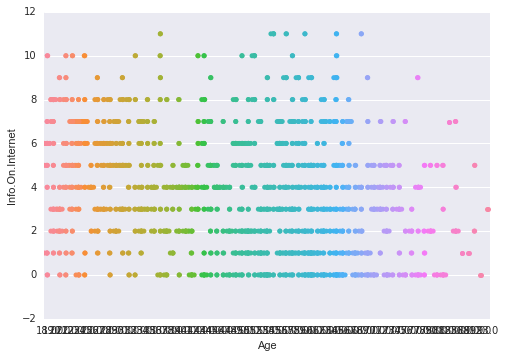

In [83]:
###matplotlib does not have jitter functionality but seaborn does
import seaborn as sns
sns.swarmplot(x='Age',y='Info.On.Internet', data=limited)
sns.stripplot(x='Age',y='Info.On.Internet', data=limited,jitter=True)

Obtain the summary of the Info.On.Internet value, broken down by whether an interviewee is a smartphone user.
* What is the average Info.On.Internet value for smartphone users?
* What is the average Info.On.Internet value for non-smartphone users?

In [95]:
limited.groupby('Smartphone')['Info.On.Internet'].mean()

Smartphone
0    2.922807
1    4.367556
Name: Info.On.Internet, dtype: float64

* What proportion of smartphone users who answered the Tried.Masking.Identity question have tried masking their identity when using the Internet?
* What proportion of non-smartphone users who answered the Tried.Masking.Identity question have tried masking their identity when using the Internet?

In [97]:
limited.groupby('Smartphone')['Tried.Masking.Identity'].mean()

Smartphone
0    0.117438
1    0.192547
Name: Tried.Masking.Identity, dtype: float64

In [103]:
limited[limited.Smartphone ==1][(limited['Tried.Masking.Identity']==1) | (limited['Tried.Masking.Identity']==0)]['Tried.Masking.Identity'].count()

483

In [104]:
limited[limited.Smartphone ==1][(limited['Tried.Masking.Identity']==1)][['Tried.Masking.Identity']].count()

Tried.Masking.Identity    93
dtype: int64

In [105]:
float(93)/483

0.19254658385093168

In [108]:
limited[limited.Smartphone ==0][(limited['Tried.Masking.Identity']==1)][['Tried.Masking.Identity']].count()

Tried.Masking.Identity    33
dtype: int64

In [109]:
limited[limited.Smartphone ==0][(limited['Tried.Masking.Identity']==1) | (limited['Tried.Masking.Identity']==0)]['Tried.Masking.Identity'].count()

281

In [111]:
float(33)/281

0.11743772241992882